In [4]:
import os
os.chdir("C:/projet")

**(1) Visualisation du fichier Davy Crockett : 12650 avis depuis septembre 2012, 352 pour 2022 (au 18/12), soit près de 30 avis par mois.**

In [5]:
import pandas as pd
reviews=pd.read_csv("hotel_davy_crockett_clean.csv", sep=",")
reviews.info( ) #7645 avis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7645 entries, 0 to 7644
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   titre_commentaire  7645 non-null   object 
 1   commentaire        7645 non-null   object 
 2   Mois_Avis          7645 non-null   object 
 3   Annee_Avis         7645 non-null   int64  
 4   Ville              7645 non-null   object 
 5   Pays               7644 non-null   object 
 6   Mois_Sejour        7645 non-null   object 
 7   Annee_Sejour       7569 non-null   float64
 8   Note               7645 non-null   int64  
 9   Photo              7645 non-null   object 
 10  langue             7645 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 657.1+ KB


In [7]:
#Le fichier comprend des avis datés entre septembre 2012 et décembre 2022
reviews['Annee_Avis'].tail(1)

7644    2004
Name: Annee_Avis, dtype: int64

In [19]:
#Nombre d'avis en 2022 : 2800 # eronné
reviews.Annee_Avis.value_counts()

2022    2800
2017    1383
2018     823
2016     687
2015     534
2019     403
2014     258
2013     186
2012     152
2011     101
2020     100
2009      56
2010      50
2021      49
2008      26
2007      20
2006       9
2005       6
2004       2
Name: Annee_Avis, dtype: int64

**(2) Ventilation des notes : seulement 32.4% des clients mettent une note de 5/5.**

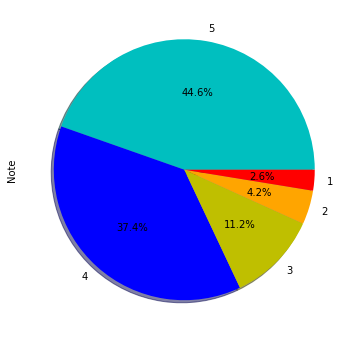

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
cols = ['c','b','y','orange','r']
reviews['Note'].value_counts().plot.pie(autopct='%1.1f%%', shadow= True,colors=cols)
plt.show()

In [21]:
p=pd.crosstab(reviews['Photo'],reviews['Note'],normalize=True)
print(p)

Note          1         2         3         4         5
Photo                                                  
no     0.022891  0.038718  0.106998  0.353957  0.415043
yes    0.002878  0.003270  0.005101  0.020013  0.031131


In [22]:
import scipy.stats as stats
from scipy.stats import chi2_contingency
results=chi2_contingency(p)
chi2  = results[0] 
pv    = results[1]
free  = results[2]
efreq = results[3]
dfExpected = pd.DataFrame(efreq, columns=p.columns, index = p.index)
print(dfExpected)

Note          1         2         3         4         5
Photo                                                  
no     0.024161  0.039368  0.105105  0.350637  0.418336
yes    0.001608  0.002620  0.006994  0.023333  0.027838


In [23]:
print(chi2)
print(pv)

0.002707697450511567
0.9999990843735541


**(3)Vectorisation**

In [24]:
import ast
liste=[ast.literal_eval(x) for x in reviews.commentaire]
from gensim.models import Word2Vec
modele = Word2Vec(liste,vector_size=2,window=5)
words= modele.wv
df =pd.DataFrame(words.vectors, columns=['V1','V2'], index=words.key_to_index.keys())

In [25]:
df.to_csv("words.vectors.txt",sep=";",header=True)

In [26]:
#(1) Mots-clés dégagés - Sélection des 50 premiers termes
dfMots= df[0:50]

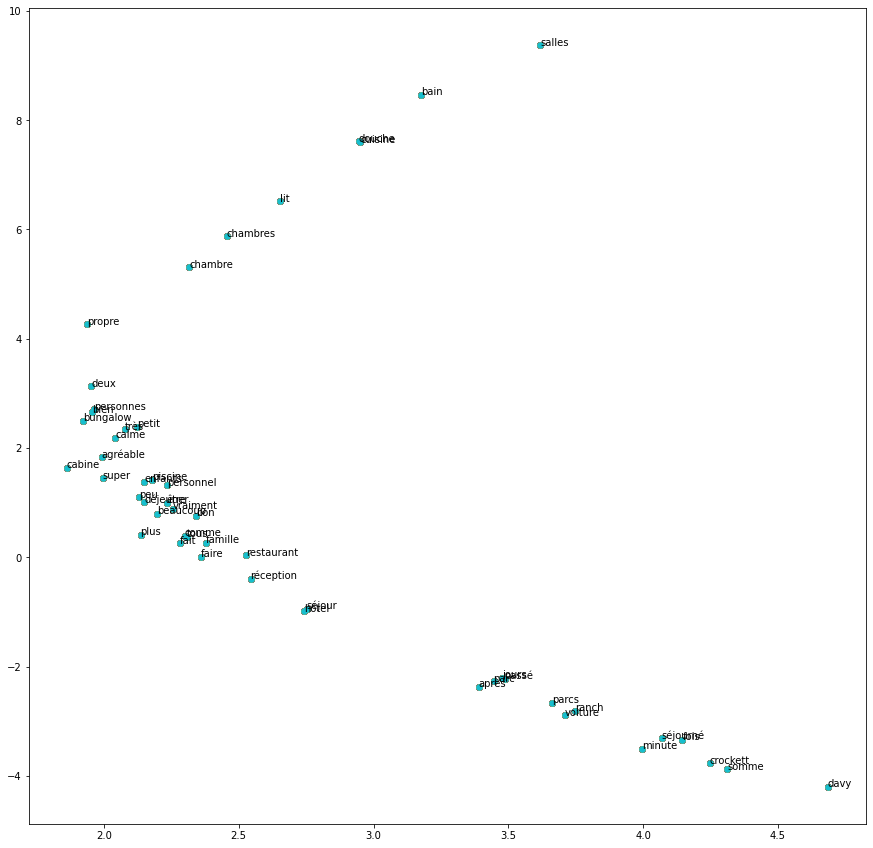

In [32]:
plt.figure(figsize=(15, 15))
for i in range(dfMots.shape[0]):
    plt.scatter(dfMots.V1,dfMots.V2,s=30)
    plt.annotate(dfMots.index[i],(dfMots.V1[i],dfMots.V2[i]))
plt.show()

In [29]:
#pour connaître les termes voisins d'un terme, par exemple d'un irritant :
words.most_similar("cher",topn=5)

[('retournerons', 1.0),
 ('option', 0.9999999403953552),
 ('lent', 0.9999995827674866),
 ('accessible', 0.9999991059303284),
 ('partis', 0.9999989867210388)]

In [34]:
#(2) Mots-clés dégagés - Sélection manuelle des thèmes dégagés (liste proche de celle de Marvel = généralisation possible)
mots = ['excellent','emplacement','personnel','dormir','impossible','boissons','personnel','inclus','conciergerie','réception','accueil','weekend','famille','piscine','bouilloire','prix','cher','loin','équipement','bébé','service','bon','bien','merveilleux','mauvaise','expérience','service','cher','baignoire','bouilloire','propre','propreté','manquait','poussière','cheveux','chambre','sommeil','buffet', 'déjeuner']
dfMots2= df.loc[mots, :]
dfMots2.head(10)

,V1,V2
excellent,2.394424,0.132833
emplacement,2.078750,1.381833
personnel,2.234525,1.318172
dormir,2.089634,1.776146
impossible,2.122089,0.598409
boissons,2.760059,0.069483
personnel,2.234525,1.318172
inclus,2.656984,-0.776356
conciergerie,0.729735,0.068306
réception,2.543882,-0.396285


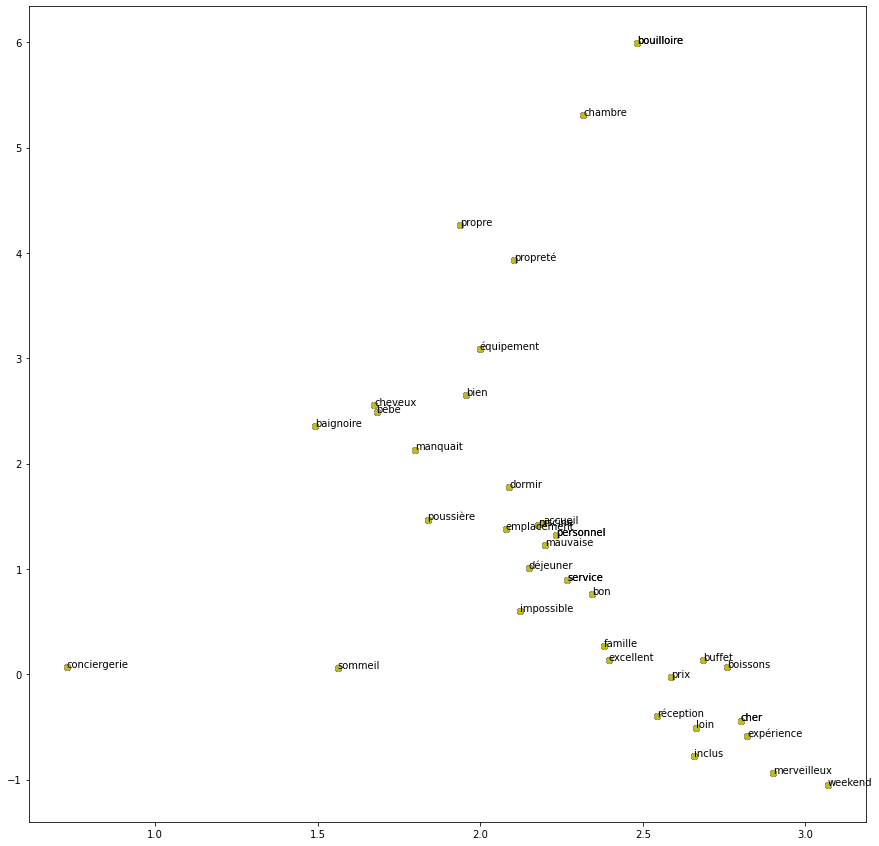

In [35]:
#graphique dans le plan

plt.figure(figsize=(15, 15))
for i in range(dfMots2.shape[0]):
    plt.scatter(dfMots2.V1,dfMots2.V2,s=30)
    plt.annotate(dfMots2.index[i],(dfMots2.V1[i],dfMots2.V2[i]))
plt.show()

In [36]:
words.most_similar('boissons',topn=10)

[('suivre', 1.0),
 ('habituels', 0.9999999403953552),
 ('poussiéreux', 0.9999998807907104),
 ('voisine', 0.9999998807907104),
 ('choisir', 0.9999996423721313),
 ('système', 0.9999993443489075),
 ('ème', 0.9999991059303284),
 ('évident', 0.999998927116394),
 ('fini', 0.999998927116394),
 ('conduite', 0.9999988675117493)]

In [37]:
words.most_similar('buffet',topn=15)

[('hangar', 1.0),
 ('fille', 0.9999998211860657),
 ('coûts', 0.9999996423721313),
 ('joie', 0.9999994039535522),
 ('présentation', 0.9999992847442627),
 ('quant', 0.9999990463256836),
 ('sensation', 0.9999989867210388),
 ('immense', 0.9999988675117493),
 ('négatives', 0.9999988079071045),
 ('bobcat', 0.9999986886978149),
 ('mine', 0.9999983310699463),
 ('employés', 0.999998152256012),
 ('ceci', 0.9999974370002747),
 ('nombreuse', 0.9999971985816956),
 ('fast', 0.999997079372406)]

In [39]:
words.most_similar('douche',topn=20)

[('salles', 0.9999998807907104),
 ('home', 0.9999997615814209),
 ('cuisine', 0.999998927116394),
 ('bains', 0.9999983310699463),
 ('chauffés', 0.9999975562095642),
 ('confortables', 0.9999948143959045),
 ('propres', 0.9999917149543762),
 ('serviette', 0.999990701675415),
 ('lavevaisselle', 0.9999904036521912),
 ('ordure', 0.9999772310256958),
 ('ferment', 0.9999662041664124),
 ('bain', 0.9999486207962036),
 ('bulle', 0.9999412894248962),
 ('nid', 0.9999198317527771),
 ('aiguisé', 0.9999136328697205),
 ('toilette', 0.999905526638031),
 ('charles', 0.9998853206634521),
 ('cuisson', 0.9998782873153687),
 ('four', 0.9998677968978882),
 ('salle', 0.9998529553413391)]